The Titan Insurance Company has just installed a new incentive payment scheme for its lift policy sales force. It wants to have
an early view of the success or failure of the new scheme. Indications are that the sales force is selling more policies, 
but sales always vary in an unpredictable pattern from month to month and it is not clear that the scheme has made a significant difference.
Life Insurance companies typically measure the monthly output of a salesperson as the total sum assured for the policies sold by
that person during the month. For example, suppose salesperson X has, in the month, sold seven policies for which the sums 
assured are £1000, £2500, £3000, £5000, £10000, £35000. X's output for the month is the total of these sums assured, £61,500. 
Titan's new scheme is that the sales force receives low regular salaries but are paid large bonuses related to their 
output (i.e. to the total sum assured of policies sold by them). The scheme is expensive for the company, but they are looking
for sales increases which more than compensate. The agreement with the sales force is that if the scheme does not at least break
even for the company, it will be abandoned after six months.The scheme has now been in operation for four months. It has settled
down after fluctuations in the first two months due to the changeover.To test the effectiveness of the scheme, Titan have taken
a random sample of 30 salespeople measured their output in the penultimate month prior to changeover and then measured it in 
the fourth month after the changeover (they have deliberately chosen months not too close to the changeover). 
The outputs of the salespeople are shown in Table 1.

In [243]:
import numpy as np
from scipy.stats import ttest_rel, ttest_ind
from statsmodels.stats.power import ttest_power
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [244]:
## numners in thousands
old_scheme = np.array([57,103,59,75,84,73,35,110,44,82,67,64,78,53,41,39,80,87,73,65,28,62,49,84,63,77,67,101,91,50])
new_scheme = np.array([62,122,54,82,84,86,32,104,38,107,84,85,99,39,34,58,73,53,66,78,41,71,38,95,81,58,75,94,100,68])

1.Find the mean of old scheme and new scheme column. (5 points)

In [245]:
old_scheme_mean, new_scheme_mean  = np.mean(old_scheme), np.mean(new_scheme)
print ("Mean of the old scheme : %0.3f " %old_scheme_mean)
print ("Mean of the new scheme : %0.3f " %new_scheme_mean)

Mean of the old scheme : 68.033 
Mean of the new scheme : 72.033 


In [246]:
old_scheme_var, new_scheme_var  = np.var(old_scheme), np.var(new_scheme)
print ("Variance of the old_scheme : %0.3f " %old_scheme_var)
print ("Mean of the new scheme : %0.3f " %new_scheme_var)

Variance of the old_scheme : 404.499 
Mean of the new scheme : 559.699 


(array([2., 3., 2., 3., 6., 4., 5., 2., 1., 2.]),
 array([ 28. ,  36.2,  44.4,  52.6,  60.8,  69. ,  77.2,  85.4,  93.6,
        101.8, 110. ]),
 <a list of 10 Patch objects>)

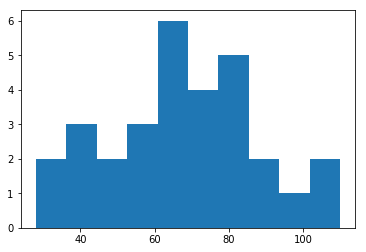

In [247]:
plt.hist(old_scheme)

(array([5., 1., 4., 2., 4., 6., 2., 3., 2., 1.]),
 array([ 32.,  41.,  50.,  59.,  68.,  77.,  86.,  95., 104., 113., 122.]),
 <a list of 10 Patch objects>)

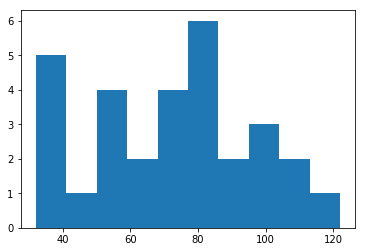

In [248]:
plt.hist(new_scheme)

2.Use the five percent significance test over the data to determine the p value to check new scheme has significantly 
raised outputs? (10 points)

In [249]:
## H0 : mu1 <= mu2
## H1 : mu2 > mu1

alpha = 0.05
 
t_statistic, p_value = ttest_rel(old_scheme, new_scheme)
print("two-sample t-stat is : %0.2f " %t_statistic)
print("two-sample p-value is : %0.2f" %p_value)

two-sample t-stat is : -1.56 
two-sample p-value is : 0.13


3.What conclusion does the test (p-value) lead to? (2.5 points)

In [250]:
if p_value < alpha:
    print ("H0 is rejected, and H1 is accepted. New scheme has significantly raised the output")
else:    
    print ("Fail to reject H0. New scheme has not raised the output.")

Fail to reject H0. New scheme has not raised the output.


4.Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the 
scheme compared to the old scheme. If this figure is alternative hypothesis, what is:

a) The probability of a type 1 error? (2.5 points)

In [275]:
# old_sample given values
n = 30
x = old_scheme_mean
s = np.std(old_scheme)

# Hypothesis
# H0 : mu <= x + 5
# H1 : mu > x + 5
# sigma unknown, henace s is taken

mu = x + 5

Zstat = (x - mu)/(s/sqrt(n))
print ("Zstat : %0.2f" %Zstat)

pval = (1-stats.norm.cdf(Zstat))
print ("pval is : %0.2f" %pval)
if pval < 0.05:
    print ("H0 is rejected")
else:
    print ("Fail to reject H0, H1 is accpeted")    

print ("probability of type1 error %0.2f." %pval)

Zstat : -1.36
pval is : 0.91
Fail to reject H0, H1 is accpeted
probability of type1 error 0.91.


b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)

In [252]:
# Since all sales output data in thousands, creating a dummy population sales dataset 
# by adding 5 (for 5000 increase avaerage output) and doing a 2 sample independent ttest

plus_5000 = np.array(old_scheme+5)

In [271]:
## H0 : mu2 - mu1 <= 5 : No Breakeven
## H1 : mu2 - mu1 > 5 : Breakeven

t_statistic, p_value = ttest_ind(old_scheme, plus_5000)

print("two-sample t-stat is :  %0.2f " %t_statistic)
print("two-sample p-value is : %0.2f" %p_value)

if p_value < alpha:
    print ("pval < alpha H0 is rejected, and H1 is accepted. New scheme has significantly raised the output")
else:    
    print ("pval > alpha Fail to reject H0. ")
    
print ("Probability for a Type 1 error : %0.2f" %p_value)

two-sample t-stat is :  -0.95 
two-sample p-value is : 0.35
pval > alpha Fail to reject H0. 
Probability for a Type 1 error : 0.35


c) Power of the test (5 points)

In [254]:
power_of_test = ttest_power(t_statistic, nobs=30, alpha=0.05, alternative="larger")
print("Power of the test : %0.2f" %power_of_test)

Power of the test : 0.00


In [255]:
power_of_test = ttest_power(t_statistic, nobs=30, alpha=0.05, alternative="smaller")
print("Power of the test : %0.2f" %power_of_test)

Power of the test : 1.00


In [256]:
power_of_test = ttest_power(t_statistic, nobs=30, alpha=0.05, alternative="two-sided")
print("Power of the test : %0.2f" %power_of_test)

Power of the test : 1.00
